__Maxmimum velocity__

$$ \frac{P}{W} = \frac{1}{2} Cd_p \rho V_m^3 (\frac{S}{W}) + \frac{2}{\rho \pi AReV_m}(\frac{W}{S}) $$

__Stall velocity__

$$ V_s = \sqrt{\frac{2}{Cl_m \rho} (\frac{W}{S})} $$

__Rate of climb__

$$ \frac{P}{W} = ROC + \frac{1}{2} Cd_p \rho V_i^3 (\frac{S}{W}) + \frac{2}{\rho \pi AReV_i}(\frac{W}{S}) $$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [3]:
class AircraftSizing:
    """Calculates the wing geometry and propulsion requirements for a hand-launched aircraft.
    
    Attributes:
        rho: Air density in kilograms per cubic meters.
        cd_airfoil: Airfoil drag coefficient.
        cd_zero: Aircraft zero-lift drag.
        v_max: Maximum speed in meters per second.
        e: Oswald's efficiency.
        ar: Expected aspect ratio.
        w_s: Expected wing loading values in Newtons per meters squared.
        cl: Coefficient of lift values.
        roc: Rate of climb.  
        v: Minimal velocity in meters per second.
        v_stall: Stall velocity in meters per second.
    """
    
    def __init__(self, rho, cd_airfoil, v_max, e, ar, w_s, cl, roc, v, v_stall):
        self.rho = rho
        self.cd_airfoil = cd_airfoil
        self.cd_zero = 1.65 * cd_airfoil
        self.v_max = v_max
        self.e = e
        self.ar = ar
        self.w_s = w_s
        self.cl = cl
        self.roc = roc
        self.v = v
        self.v_stall = v_stall
        
    @property
    def labels(self):
        labels = ['Max. Velocity']
        labels += [f'ROC={roc} m/s' for roc in self.roc]
        labels += [f'Cl={cl}' for cl in self.cl]
        return labels
        
    @property
    def maximum_velocity(self):
        return ((1 / 2) * self.cd_zero * self.rho * (self.v_max**3) * (1 / self.w_s) + 
                (2 * self.w_s) / (self.rho * np.pi * self.ar * self.e * self.v_max))**(-1)
    
    @property
    def rate_of_climb(self):
        return (self.roc.reshape(1, self.roc.shape[0]) + (1 / 2) * self.cd_zero * self.rho 
                * (self.v**3) * (1 / self.w_s.reshape(self.w_s.shape[0], 1)) + 
                (2 * self.w_s.reshape(self.w_s.shape[0], 1)) / (self.rho * np.pi * self.ar * self.e * self.v))**(-1)
    
    @property
    def stall_velocity(self):
        return ((self.v_stall**2) * self.cl * self.rho) / 2
    
    def plot_matching_graph(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.w_s, self.maximum_velocity)
        plt.plot(self.w_s, self.rate_of_climb)
        plt.ylabel('Power Loading (N/W)')
        plt.xlabel('Wing Loading (Pa)')
        for i, velocity in enumerate(self.stall_velocity):
            plt.axvline(velocity, linestyle='--', color=colors[i])
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels=self.labels)
        plt.title('Matching Graph')
        plt.show()

### Instantiate the class.

In [4]:
aircraft_sizing = AircraftSizing(1.225, 0.02, 27.432, 0.83, 8, np.arange(25, 125, 1), 
                                 np.arange(0.9, 1.3, 0.1), np.linspace(3.048, 4.8768, 4), 3.048, 10.668)

### Plot the results.

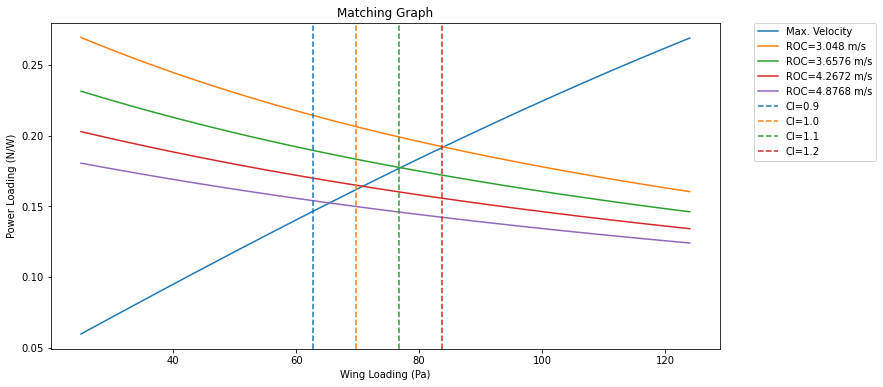

In [5]:
aircraft_sizing.plot_matching_graph()